<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/March/03.02/SEN/03_02(CIFAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR -10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


* min-max scaling

In [ ]:
min_n, max_n = train_x.min(), train_x.max()

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x-min_n)/(max_n - min_n)

In [ ]:
print(train_x.min(), test_x.max())

0.0 1.0


* One - Hot encoding

In [ ]:
train_y.shape

(50000, 1)

In [ ]:
class_n = len(np.unique(train_y))

In [ ]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

### 모델링
* Functional API
* Hidden Layer
* Flatten()

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 모델 layer 엮기
il = keras.layers.Input(shape=(32,32,3))
fl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(256, 'relu')(fl)
hl = keras.layers.Dense(128, 'relu')(hl)
hl = keras.layers.Dense(64, 'relu')(hl)
ol = keras.layers.Dense(10, 'softmax')(hl)

# 모델 input, ouput 정의
model = keras.models.Model(il, ol)

# 모델 컴파일
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
              optimizer = 'adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   patience = 5,
                   min_delta = 0,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
history = model.fit(train_x, train_y, epochs=50, verbose = 1,
          validation_split = 0.2, callbacks = [es])

Epoch 1/50
1250/1250 [==============================] - 8s 4ms/step - loss: 1.8960 - accuracy: 0.3119 - val_loss: 1.7948 - val_accuracy: 0.3553
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7169 - accuracy: 0.3813 - val_loss: 1.6830 - val_accuracy: 0.3967
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6319 - accuracy: 0.4141 - val_loss: 1.6884 - val_accuracy: 0.4069
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5790 - accuracy: 0.4330 - val_loss: 1.5951 - val_accuracy: 0.4266
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5439 - accuracy: 0.4463 - val_loss: 1.5653 - val_accuracy: 0.4401
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5100 - accuracy: 0.4601 - val_loss: 1.5339 - val_accuracy: 0.4539
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4839 - accuracy: 0.4697 - val_loss: 1.5686 - val_accuracy:

In [ ]:
print(model.evaluate(train_x, train_y))
print(model.evaluate(test_x, test_y))

1563/1563 [==============================] - 4s 3ms/step - loss: 1.3177 - accuracy: 0.5290
[1.3176788091659546, 0.5290200114250183]
313/313 [==============================] - 1s 3ms/step - loss: 1.4452 - accuracy: 0.4803
[1.4451760053634644, 0.48030000925064087]


In [ ]:
pred_train = model.predict(train_x).argmax(axis = 1)
pred_test = model.predict(test_x).argmax(axis = 1)

print('train 정확도 : {:.2f}%'.format(accuracy_score(train_y.argmax(axis = 1), pred_train)))
print('test 정확도 : {:.2f}%'.format(accuracy_score(test_y.argmax(axis = 1), pred_test)))


313/313 [==============================] - 1s 2ms/step
train 정확도 : 0.53%
test 정확도 : 0.48%


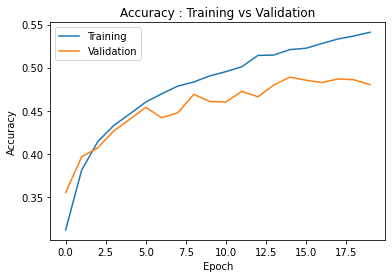

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

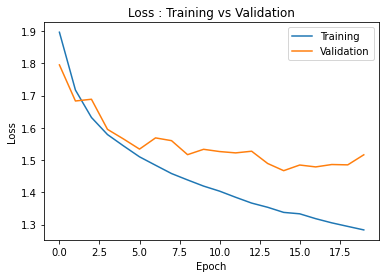

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()